#                                                           EDA on Titanic dataset

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Fetching dataset

In [5]:
df=pd.read_csv("C:\\Users\\91954\\OneDrive\\Desktop\\datasets\\Titanic Dataset\\Titanic-Dataset.csv",delimiter=',')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data cleaning

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.shape

(891, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Null values')

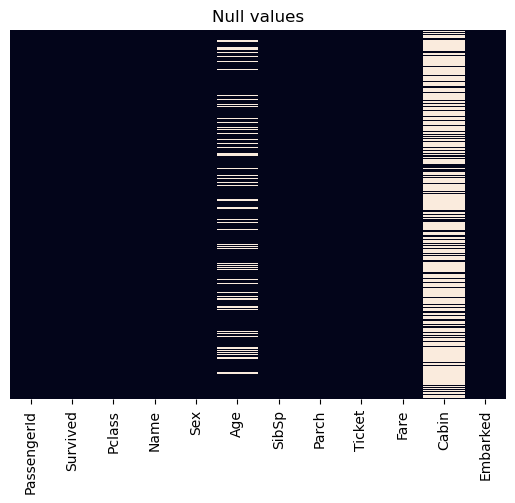

In [23]:
sns.heatmap(data=df.isnull(),yticklabels=False,cbar=False)
plt.title('Null values')

In [28]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
df['Sex']=df['Sex'].map({'male':0,'female':1})

In [33]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [31]:
embarked=pd.get_dummies(df['Embarked'],drop_first=True,dtype='int64')

In [34]:
df.drop(['PassengerId','Ticket','Cabin'],axis=1,inplace=True)

In [36]:
df.drop(['Name','Embarked'],axis=1,inplace=True)

In [37]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,1,NaN,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


In [45]:
df=pd.concat([df,embarked],axis=1)

In [46]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,1
887,1,1,1,19.0,0,0,30.0000,0,1
888,0,3,1,NaN,1,2,23.4500,0,1
889,1,1,0,26.0,0,0,30.0000,0,0


<Axes: xlabel='Pclass', ylabel='Age'>

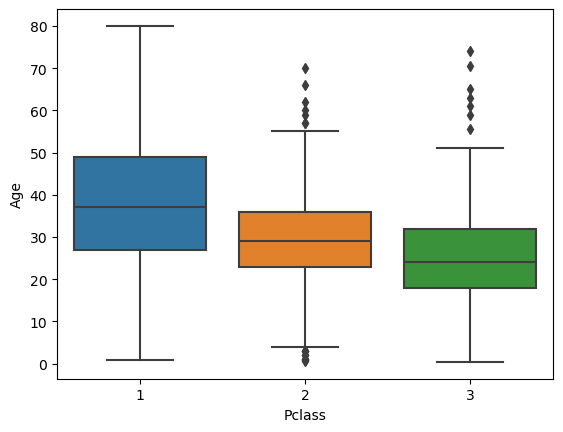

In [47]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [53]:
def fill_null_Age(cols):
    age=cols.iloc[0]
    pclass=cols.iloc[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 25
    return age
    

In [54]:
df['Age']=df[['Age','Pclass']].apply(fill_null_Age,axis=1)

In [55]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Q           0
S           0
dtype: int64

In [58]:
df['Age']=df['Age'].astype('int64')

In [59]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,0,22,1,0,7.2500,0,1
1,1,1,1,38,1,0,71.2833,0,0
2,1,3,1,26,0,0,7.9250,0,1
3,1,1,1,35,1,0,53.1000,0,1
4,0,3,0,35,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,0,1
887,1,1,1,19,0,0,30.0000,0,1
888,0,3,1,25,1,2,23.4500,0,1
889,1,1,0,26,0,0,30.0000,0,0


## Data Visualization

Text(0.5, 1.0, 'Survival plot')

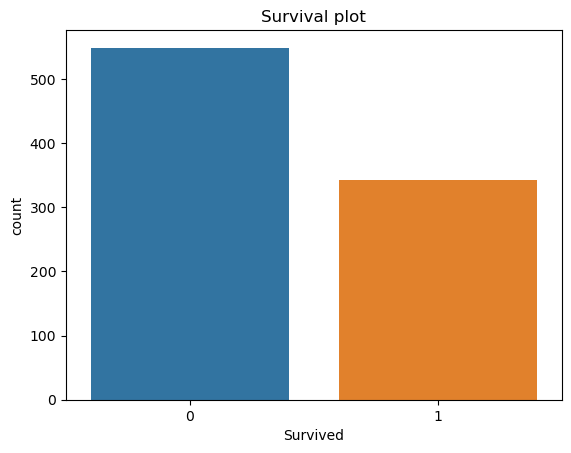

In [72]:
sns.countplot(x='Survived',data=df)
plt.title('Survival plot')

From the above plot we can understand that more than 500 people are dead and around 350 are alive

In [64]:
df['Sex']=df['Sex'].astype(str)

Text(0.5, 1.0, 'Survival on the basis of Sex')

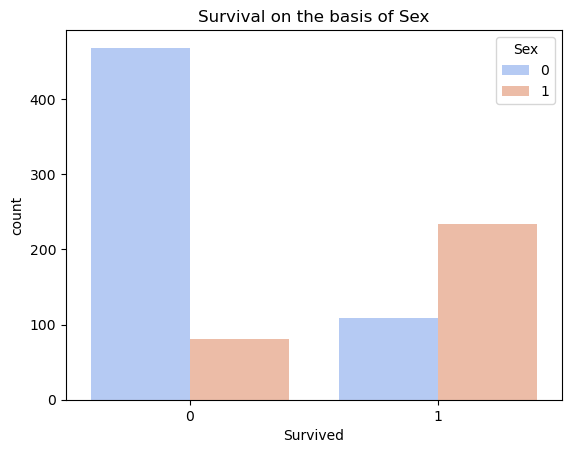

In [73]:
sns.countplot(x='Survived',hue='Sex',data=df, palette='coolwarm')
plt.title('Survival on the basis of Sex')

Text(0.5, 1.0, 'Survival on the basis of Passenger Class')

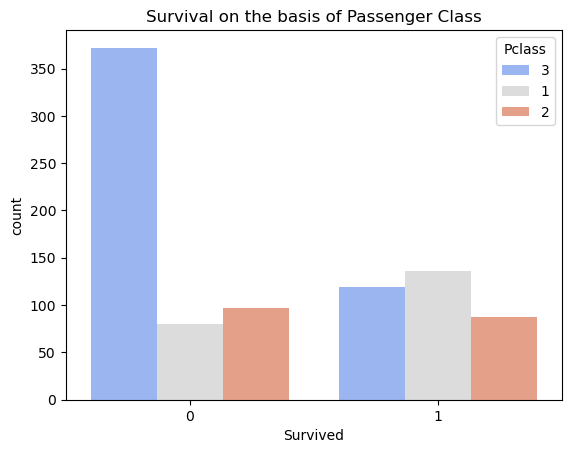

In [74]:
df['Pclass']=df['Pclass'].astype(str)
sns.countplot(x='Survived',hue='Pclass',data=df,palette='coolwarm')
plt.title('Survival on the basis of Passenger Class')

Text(0.5, 1.0, 'Count of siblings')

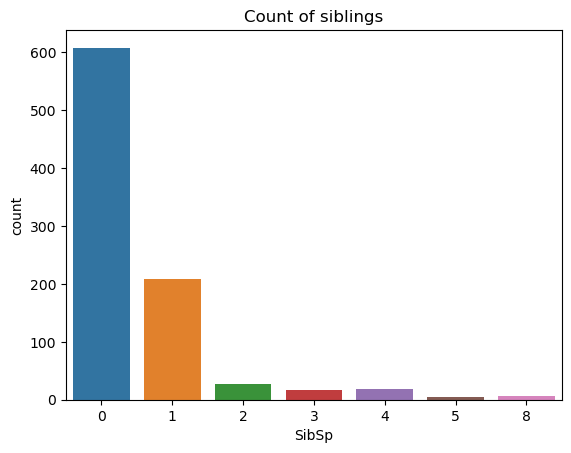

In [82]:
sns.countplot(x='SibSp',data=df)
plt.title('Count of siblings')

Text(0.5, 1.0, 'count of siblings on the basis of sex')

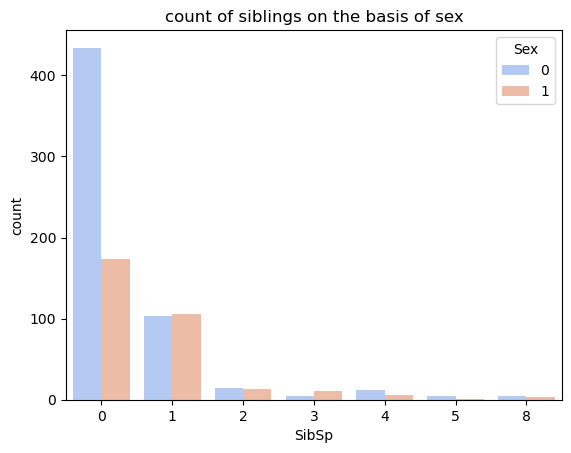

In [84]:
sns.countplot(x='SibSp',hue='Sex',data=df,palette='coolwarm')
plt.title('count of siblings on the basis of sex')

<Axes: >

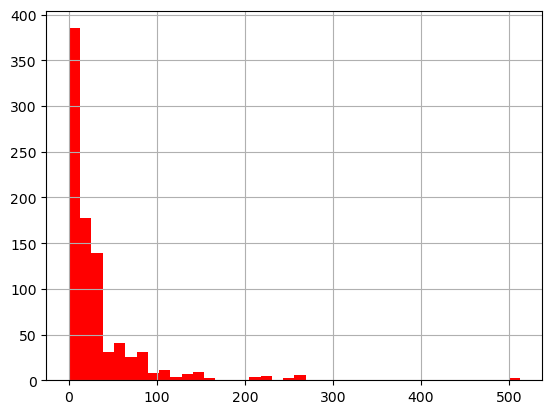

In [85]:
df['Fare'].hist(color='red',bins=40)

Text(0.5, 1.0, 'Price of the ticket on the basis of passenger class and gender')

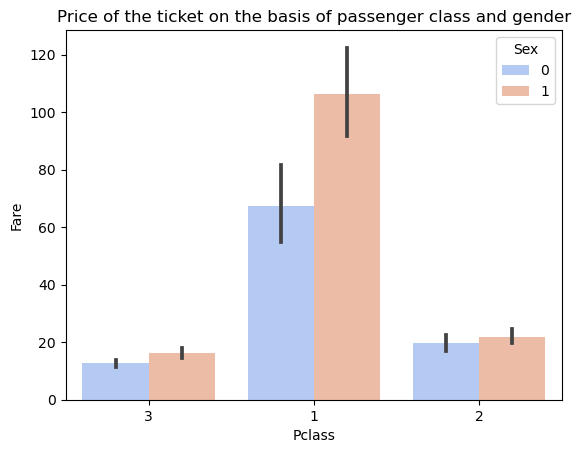

In [81]:
sns.barplot(x='Pclass',y='Fare',hue='Sex',data=df,palette='coolwarm')
plt.title('Price of the ticket on the basis of passenger class and gender')